<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis**


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import piplite
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [7]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [8]:
median_age = df['Age'].median()
print(f"The median age of survey respondents is: {median_age}")

The median age of survey respondents is: 29.0


<ipython-input-9-ad8e2a187c2d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)


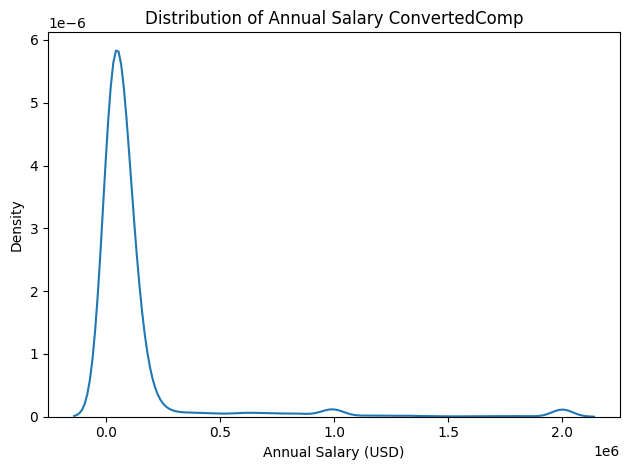

In [9]:
# Plot the distribution curve
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)

# Add labels and title
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Salary ConvertedComp')

# Show plot
plt.tight_layout()
plt.show()

Plot the histogram for the column `ConvertedComp`.


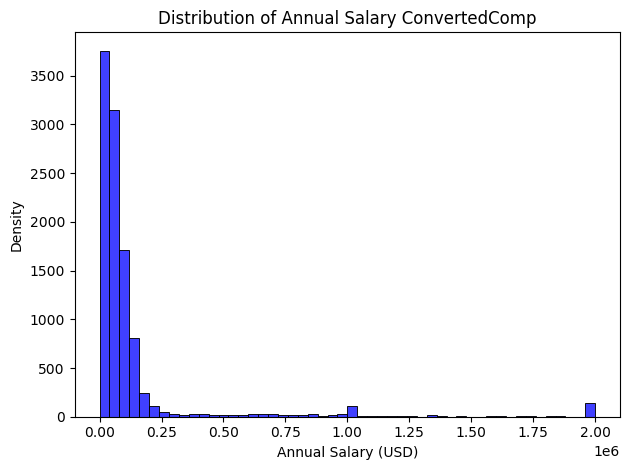

In [10]:
# Plot the histogram
sns.histplot(df['ConvertedComp'], kde=False, color='blue', bins=50)

# Add labels and title
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Salary ConvertedComp')

# Show plot
plt.tight_layout()
plt.show()

What is the median of the column `ConvertedComp`?


In [11]:
# Calculate the median of ConvertedComp column
median_salary = df['ConvertedComp'].median()

print(f"The median salary (ConvertedComp) is: {median_salary}")

The median salary (ConvertedComp) is: 57745.0


How many responders identified themselves only as a **Man**?


In [12]:
# Count responders who identified only as Man
only_man_count = df[df['Gender'] == 'Man'].shape[0]

print(f"The number of responders who identified only as a Man: {only_man_count}")

df["Gender"].value_counts()

The number of responders who identified only as a Man: 10480


Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [13]:
# Filter responders who identified only as Woman and calculate median ConvertedComp
median_salary_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print(f"The median ConvertedComp of responders identified only as Woman is: {median_salary_woman}")

The median ConvertedComp of responders identified only as Woman is: 57708.0


Give the five number summary for the column `Age`?


In [14]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


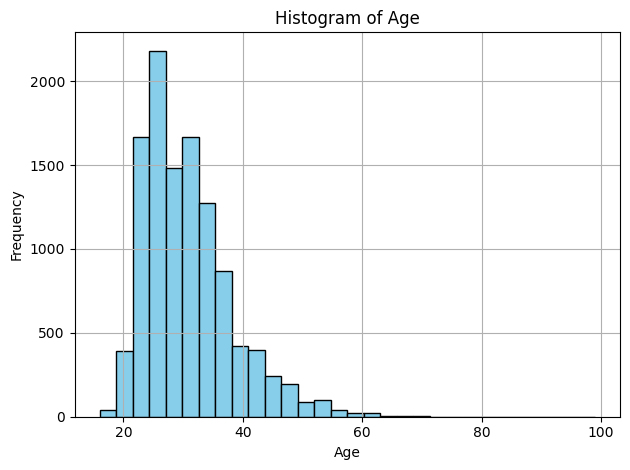

In [15]:
# Plot histogram of Age column
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as desired

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


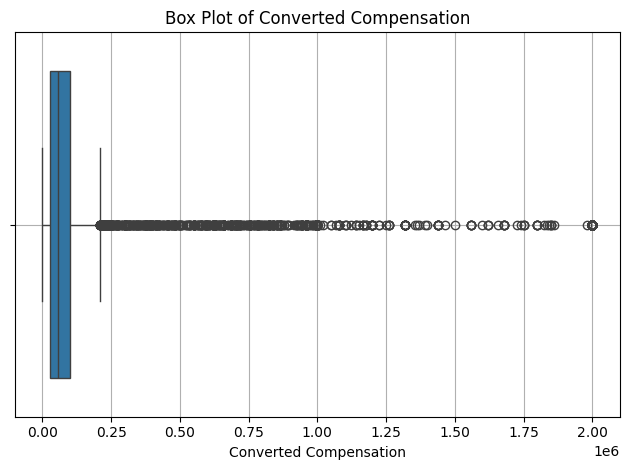

In [16]:
# Create a box plot for ConvertedComp column
sns.boxplot(x=df['ConvertedComp'])

# Add labels and title
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# Calculate Q1 (first quartile) and Q3 (third quartile) for ConvertedComp
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [18]:
#Find out the upper and lower bounds.
Q4 = df['ConvertedComp'].quantile(1)
print('upper bound is', Q1)
print('lower bound is', Q4)

upper bound is 26868.0
lower bound is 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < Q4) | (df['ConvertedComp'] > Q1)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in ConvertedComp column: {num_outliers}")

Number of outliers in ConvertedComp column: 10582


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# Create new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= Q4) & (df['ConvertedComp'] <= Q1)]

# Print summary statistics of ConvertedComp before and after removing outliers
print("Summary statistics of ConvertedComp before removing outliers:")
print(df['ConvertedComp'].describe())

print("\nSummary statistics of ConvertedComp after removing outliers:")
print(df_no_outliers['ConvertedComp'].describe())

Summary statistics of ConvertedComp before removing outliers:
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Summary statistics of ConvertedComp after removing outliers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ConvertedComp, dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.

In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with Age column
age_correlations = correlation_matrix['Age']

print("Correlation of Age with other numerical columns:")
print(age_correlations)

<ipython-input-21-c78edcc8c468>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation of Age with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


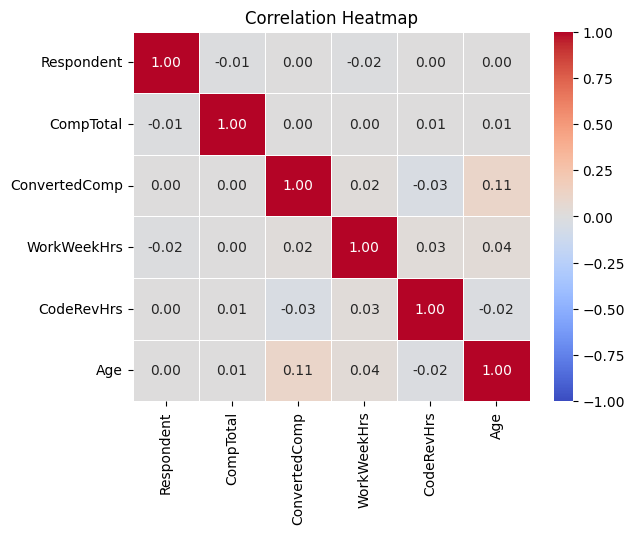

In [22]:
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
